In [1]:
import scycle as cc
import scanpy as sc
import numpy as np

import sys
DATA_PATH = '/home/risitop/OneDrive/Documents/PHD/y1/data/EwingSarcoma_Miller2020/'
sys.path.append(DATA_PATH)

In [2]:
## We start from CPM_data.h5ad, which contains CPM_data.txt + Metadata.txt annotations
adata_9 = sc.read_h5ad(DATA_PATH + 'CHLA9.h5ad')

## Computing a cell cycle trajectory estimation on a dataset copy
cc.pp.filter_cells(adata_9)
cc.pp.prep_pooling(adata_9)
cc.tl.dimensionality_reduction(adata_9, method="ica")
cc.tl.enrich_components(adata_9, verbose=True)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.39
Detected doublet rate = 3.7%
Estimated detectable doublet fraction = 38.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 9.6%
Elapsed time: 7.4 seconds
177 doublets encountered
3763 cells pass the doublet and counts filters.
4547  cells pass the mt filter
Cells selected 3758
Preparing embedding...
Embedding for pooling...
Pooling 3758 cells...
Scoring cell cycle...
-- Dimensionality reduction using ICA...
-- Done
--- Selected components:
G1/S: 1 (score=7.136818)
G2/M: 13 (score=10.176798)
G2/M-: 14 (score=6.766575)
Histones: 6 (score=17.437213)
--- Selected components:
G1/S: 1 (score=7.136818)
G2/M: 13 (score=10.176798)
G2/M-: 14 (score=6.766575)
Histones: 6 (score=17.437213)


In [3]:
## We start from CPM_data.h5ad, which contains CPM_data.txt + Metadata.txt annotations
adata_10 = sc.read_h5ad(DATA_PATH + 'CHLA10.h5ad')

## Computing a cell cycle trajectory estimation on a dataset copy
cc.pp.filter_cells(adata_10)
cc.pp.prep_pooling(adata_10)
cc.tl.dimensionality_reduction(adata_10, method="ica")
cc.tl.enrich_components(adata_10, verbose=True)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.38
Detected doublet rate = 3.2%
Estimated detectable doublet fraction = 42.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 7.5%
Elapsed time: 6.7 seconds
148 doublets encountered
3642 cells pass the doublet and counts filters.
4534  cells pass the mt filter
Cells selected 3642
Preparing embedding...
Embedding for pooling...
Pooling 3642 cells...
Scoring cell cycle...
-- Dimensionality reduction using ICA...
-- Done
--- Selected components:
G1/S: 0 (score=8.228217)
G2/M: 3 (score=10.603588)
G2/M-: 4 (score=9.307737)
Histones: 2 (score=17.346504)
--- Selected components:
G1/S: 0 (score=8.228217)
G2/M: 3 (score=10.603588)
G2/M-: 4 (score=9.307737)
Histones: 2 (score=17.346504)


In [4]:
cc.tl.principal_circle(adata_9)
cc.tl.celldiv_moment(adata_9)
cc.tl.remap_nodes(adata_9)
cc.tl.pseudotime(adata_9)
cc.tl.curvature(adata_9)

Suggested moment of cell division: [5 6]
Direction of cell cycle: -1
Remapping edges using [5 6] ...
Remapping edges using [0, 1] ...
Calculating pseudotimes for each cell...


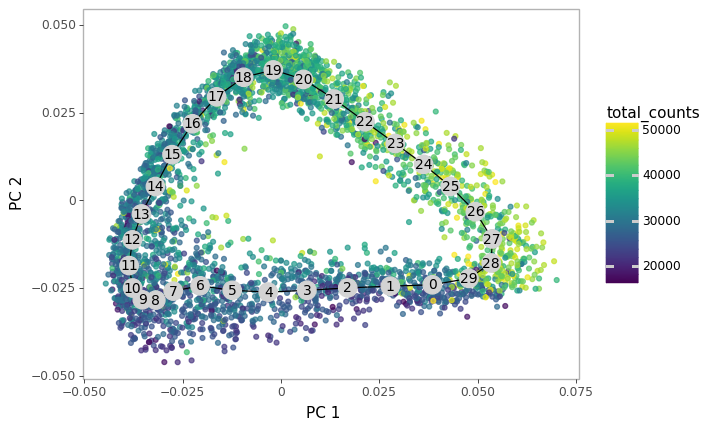

<ggplot: (8786749177652)>

In [5]:
cc.pl.scatter_projection(adata_9, trajectory=True)

In [6]:
cc.tl.principal_circle(adata_10)
cc.tl.celldiv_moment(adata_10)
cc.tl.remap_nodes(adata_10)
cc.tl.pseudotime(adata_10)
cc.tl.curvature(adata_10)

Suggested moment of cell division: [26 27]
Direction of cell cycle: 1
Remapping edges using [26 27] ...
Remapping edges using [0, 1] ...
Calculating pseudotimes for each cell...


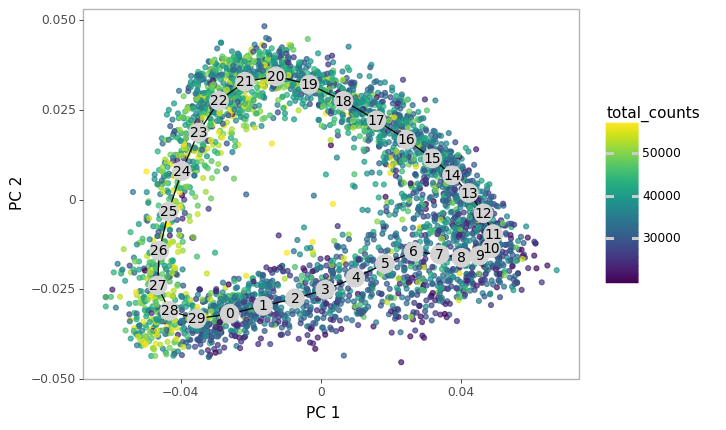

<ggplot: (8786748895223)>

In [7]:
cc.pl.scatter_projection(adata_10, trajectory=True)

In [8]:
cc.tl.integration(adata_10, adata_9, verbose=True, algorithm='woti', 
                  scale_src=0.03, scale_ref=0.03)

-- Automatically detecting cell-cycle components...
-- Integrating datasets...
> Selecting common genes...
> 9221 genes selected.
> Slicing matrices...
> Performing optimal transport based integration using WOTi...
WOTi > Computing source distribution weights...
WOTi > Computing reference distribution weights...
WOTi > Computing optimal transport plan...
WOTi > Projecting source dataset...
-- Done


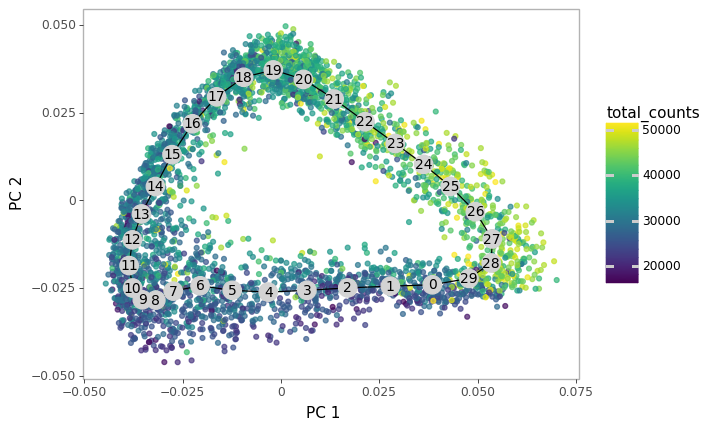

<ggplot: (8786748740072)>

In [9]:
cc.pl.scatter_projection(adata_9, trajectory=True)

In [10]:
cc.tl.principal_circle(adata_10)
cc.tl.celldiv_moment(adata_10)
cc.tl.remap_nodes(adata_10)
cc.tl.pseudotime(adata_10)
cc.tl.curvature(adata_10)

Suggested moment of cell division: [7 8]
Direction of cell cycle: 1
Remapping edges using [7 8] ...
Remapping edges using [0, 1] ...
Calculating pseudotimes for each cell...


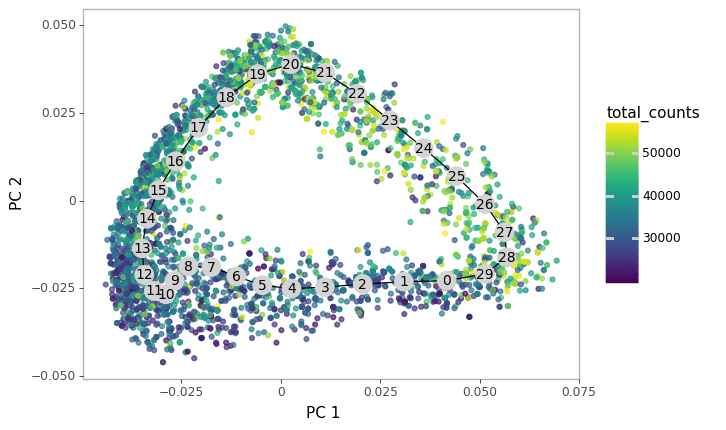

<ggplot: (8786748736232)>

In [11]:
cc.pl.scatter_projection(adata_10, trajectory=True)